# Part 3: Cancer

In this part of the assignment, you will build a predictive model to classify a given breast tumor as cancer or not based on exam measurements of the size and shape of the tumor. 

**Learning objectives.** You will:
1. Train and test a logistic regression model for binary classification. 
2. Evaluate and interpret a range of metrics including the confusion matrix, precision, recall, and ROC curve.
3. Look for evidence of overfitting and perform hyperparameter selection to choose a regularization weight on a validation set to mitigate overfitting.
4. Fit and discuss an interpretable shallow decision tree model.

The following code will download all of the data, print the feature names, and preview one example. The target value is binary: either `1` or `0` depending on whether the tumor is malignant or benign.

The code stores the feature matrix `X` as a two-dimensional NumPy array where each row corresponds to a data point and each column is a feature. The target value is stored as a one-dimensional NumPy array `y` where the index `i` element of `y` correpsonds to the row `i` data point of `X`.

Your overall goal in this part is to build and evaluate a logistic model to predict the target variable `y` as a function of the ten features in `X` by predicting the probability that a given tumor is malignant.

In [1]:
# Run but DO NOT MODIFY this code

from sklearn.datasets import load_breast_cancer

# Load the diabetes dataset
cancer = load_breast_cancer()
print(cancer.feature_names)

# Get the feature data and target variable
X = cancer.data
y = cancer.target

# Preview the first data point
print(X[0])
print(y[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Task 1

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with at least 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results. 

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

## Task 2

Build and evaluate a baseline model as follows. Calculate the proportion of the training data with target `1`, call this proportion `p`. For each example in the test data, randomly predict `1` with probability `p` and `0` otherwise. Set a random seed of `2024` before starting for reproducibility.

Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Briefly interpret the confusion matrix, precision, and recall. What do these quantities mean in the context of the predictive task?

Precision: 0.5614035087719298
Recall: 0.6153846153846154


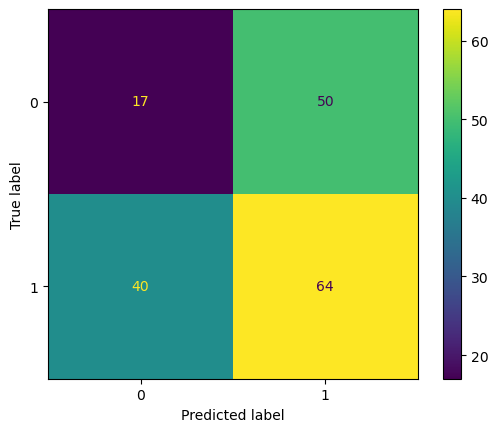

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

p = np.mean(y_train)
np.random.seed(2024)
random_predictions = np.random.choice([0, 1], size=y_test.shape[0], p=[1-p, p])

cm = confusion_matrix(y_test, random_predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

precision = precision_score(y_test, random_predictions)
recall = recall_score(y_test, random_predictions)
print(f"Precision: {precision}")
print(f"Recall: {recall}")                     

The relatively average (as in "not great, but not bad") precision and recall scores say that, respectively, the model was correct 56% of the time it predicted a tumor, and it correctly identified 62% of tumors. It seems like there were many true positives, but not enough true negatives. 

## Task 3

Randomly split the *training* data into a *train* and *validation* set; similar to how you [randomly split the original dataset](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the training data (equals 70% times 30% = 21% of the overall data) reserved for the validation set. Use a random seed of `2024` for reproducibility of the results.

Build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter setting `penalty = 'None'` (this will train a basic model without applying any regularization). 

Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of your model on both (a) the train set, and (b) the validation set. Report your results and briefly explain whether you find evidence of *overfitting*, along with a brief description of what that means. 

If you do find evidence of overfitting, retrain the model (potentially multiple times) to reduce the overfitting by changing the `penalty` parameter to `l2` (this is the default) and trying different values of the `C` hyperparameter that controls the strength of regularization. Show your work and explain in English how you decided on a good setting of the hyperparameter `C` controlling the degree of regularization. 

You should conclude this task by reporting a final model that achieves comparable accuracy on the train set as the unregularized model and that mitigates any evidence of overfitting (it may not be possible to achieve a validation error that is no greater than the train error, but you should reduce the gap).

In [15]:
from sklearn.linear_model import LogisticRegression

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=2024)

logistic_no_reg = LogisticRegression(penalty=None, random_state=2024, max_iter = 100000)
logistic_no_reg.fit(X_train_split, y_train_split)

training_accuracy = logistic_no_reg.score(X_train_split, y_train_split)

validation_accuracy = logistic_no_reg.score(X_val_split, y_val_split)

print(f"Training accuracy (no regularization): {training_accuracy}")
print(f"Validation accuracy (no regularization): {validation_accuracy}")

possible_C = np.logspace(0, 7, 50)

best_C = None
best_validation_accuracy = 0
best_training_accuracy = 0

for C in possible_C:
    logistic_reg = LogisticRegression(penalty='l2', C=C, random_state=2024, max_iter=1000000)
    logistic_reg.fit(X_train_split, y_train_split)
    
    training_accuracy = logistic_reg.score(X_train_split, y_train_split)
    validation_accuracy = logistic_reg.score(X_val_split, y_val_split)
  
    if validation_accuracy > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        best_C = C
        best_training_accuracy = training_accuracy

print(f"Best C: {best_C}")
print(f"Training accuracy with best C: {best_training_accuracy}")
print(f"Validation accuracy with best C: {best_validation_accuracy}")

Training accuracy (no regularization): 1.0
Validation accuracy (no regularization): 0.9666666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best C: 517947.4679231202
Training accuracy with best C: 0.9928057553956835
Validation accuracy with best C: 0.975


The training and validation accuracy without regularization are actually quite good (somehow I have 1 for training accuracy w/o regularization). Similar to in Part 1, I iterate over different values of C and adjust the model according to which ones are the best. It seems that the model prefers high regularization, with the "best C" being very large. I could not get a convergent value no matter how many interations I did. However, the values I did get yielded a smaller generalization gap. 

## Task 4

For the final model you trained in task 3, compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Based on your results, briefly describe how the resulting model is an improvement over the baseline from task 2, interpreting the reported metrics in the context of the predictive task.

Precision: 0.9795918367346939
Recall: 0.9230769230769231


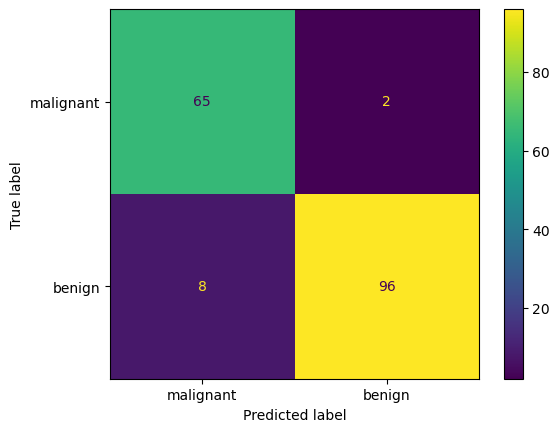

In [17]:
y_pred_test = logistic_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
cm_display.plot()

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

This model is a massive improvement from task 2. It is correct 98% of the time it identifies a tumor, and identifies 92% of tumors.  

## Task 5

For the predictions of your final model trained in task 3, compute and visualize the [Receiver Operator Characteristic (ROC) Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#roccurvedisplay). Note that you need to use the *probability predictions* of the model, *not* the absolute 0/1 predictions, in order to correctly plot the ROC curve.

Briefly interpret the ROC curve. In particular, what change(s) in the model account for the different possible false positive rates and true positive rates represented on the curve? In the context of a cancer detection task, why might one prefer to select a point on the curve other than the default (represented by your previous results in task 4)?

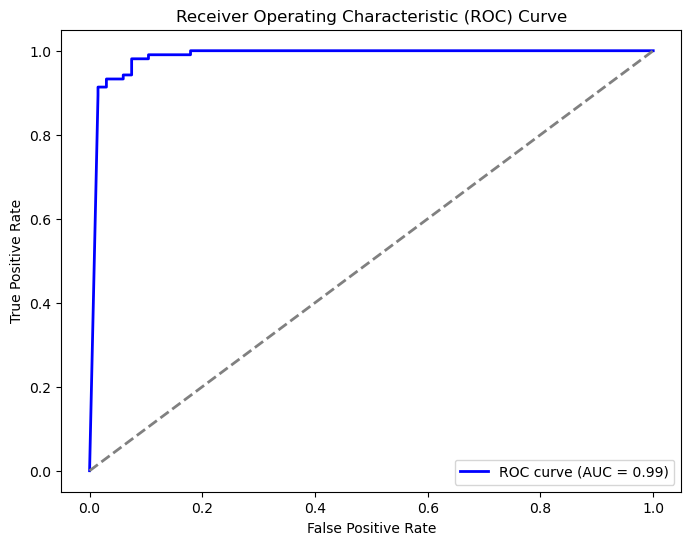

Area under curve: 0.99


In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_test = logistic_reg.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Area under curve: {roc_auc:.2f}")

An AUC of .99 indicates that the model performed excellently. Choosing a lower threshold increases the likelihood of predicting malignant tumors, but also increases false positives. Raising the threshold does the opposite. 

## Task 6

In practice, it can be very helpful to under **why** a predictive model made a particular prediction. *Interpretable* models have the property that a human can understand this aspect. One example of an interpretable model is the *decision tree*, especially a *shallow* decision tree.

Build three [decision tree classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), one for each setting of the `max_depth` hyperparameter to `3`, `5`, and `7`. Fit each model on the train set from task 3, and evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of each model on the validation set (also from task 3). 

Report all of these validation measures for each model corresponding to different settings of `max_depth`, and select one as your final model. Briefly explain why you would select that model for this task. Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of your final decision tree model.

Max Depth: 3
Accuracy: 0.9416666666666667
Precision: 0.922077922077922
Recall: 0.9861111111111112

Max Depth: 5
Accuracy: 0.9083333333333333
Precision: 0.9295774647887324
Recall: 0.9166666666666666

Max Depth: 7
Accuracy: 0.9166666666666666
Precision: 0.9305555555555556
Recall: 0.9305555555555556



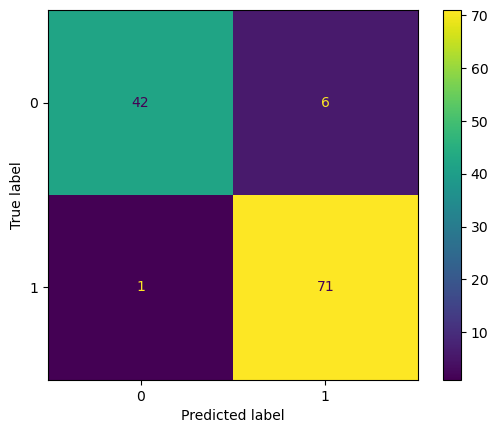

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_values = [3, 5, 7]

results = {}

for max_depth in max_depth_values:

    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=2024)
    tree_model.fit(X_train_split, y_train_split)

    y_val_pred = tree_model.predict(X_val_split)

    accuracy = accuracy_score(y_val_split, y_val_pred)
    precision = precision_score(y_val_split, y_val_pred)
    recall = recall_score(y_val_split, y_val_pred)

    results[max_depth] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

for max_depth, metrics in results.items():
    print(f"Max Depth: {max_depth}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")

# here I choose to prefer recall 
best_max_depth = max(results, key=lambda k: results[k]['Recall']) 
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=2024)
final_model.fit(X_train_split, y_train_split)

y_pred = final_model.predict(X_val_split)
cm = confusion_matrix(y_val_split, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

For the model corresponding to the decision tree of depth 3, there was both the highest accuracy and the highest recall. I chose to prioritize recall over anything else because we are in the context of cancer detection, so the most important thing a model could do would be minimize the number of false negatives. 